### Load libraries

In [104]:
from parameters import parameters as par
from model import Model
from modules.loader import Loader
from simulator import Simulator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pickle

### Select dates and education level
- All solutions are stored in 'Pickled_Solutions' folder

### Note:
- It is important to change the cost for pi and kappa manually in agent.py such that the costs correspond to the simulateed outcome. Unfortunately, these costs weren't stored in the parameters. Keep this in mind.

In [105]:
date = '18-05'
educ = ['<HS', 'HS', 'College'] # Can be either '<HS', 'HS' or 'College'
add_text = 'log_2' # Can be empty, pi_0 (currently only for <HS)
NUMBER_OF_PERSONS = 10000
col = '#070d0d'

### Load solution

### Run simulation

In [106]:
state_dict = dict()
choice_dict = dict()

for ed in educ:
    state_dict[ed] = []
    choice_dict[ed] = []
    V_sol, C_sol, par_ = Loader.load('Pickled_Solutions/Run_' + ed + '/' + date + add_text)
    states, choices, shocks = Simulator.simulate(V_sol, C_sol, par_, NUMBER_OF_PERSONS)
    
    state_dict[ed].append(states[0,:]) # m
    state_dict[ed].append(states[1,:]) # f
    
    choice_dict[ed].append(choices[0,:]) # c
    choice_dict[ed].append(choices[1,:]) # kappa
    choice_dict[ed].append(choices[2,:]) # i
    

# State plots

In [107]:
# Set path to save picture
pic_path = '/Users/ditlevkf/Ditlev/KU/Kandidaten/DP/Projekt/Code/dypa_termpaper/chapters/'

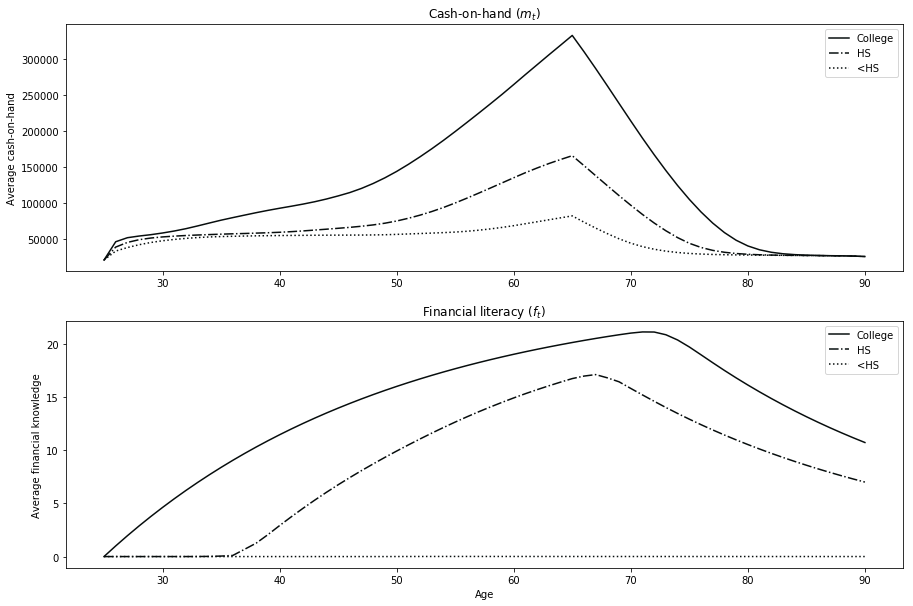

In [112]:
FIGSIZE = (15, 10)
f, (ax1, ax2) = plt.subplots(2, 1, figsize=FIGSIZE)
ax1.set_title("Cash-on-hand ($m_t$)")
ax1.plot(range(25, 91), state_dict['College'][0].mean(axis=1), color=col, label = 'College', linestyle = '-')
ax1.plot(range(25, 91), state_dict['HS'][0].mean(axis=1), color=col, label = 'HS', linestyle = '-.')
ax1.plot(range(25, 91), state_dict['<HS'][0].mean(axis=1), color=col, label = '<HS', linestyle = ':')
ax1.set_ylabel('Average cash-on-hand')
#ax1.set_xlabel('Age')

ax1.legend()

ax2.set_title("Financial literacy ($f_t$)")
ax2.plot(range(25, 91), state_dict['College'][1].mean(axis=1), color=col, label = 'College')
ax2.plot(range(25, 91), state_dict['HS'][1].mean(axis=1), color=col, label = 'HS', linestyle = '-.')
ax2.plot(range(25, 91), state_dict['<HS'][1].mean(axis=1), color=col, label = '<HS', linestyle = ':')
ax2.set_ylabel('Average financial knowledge')
ax2.set_xlabel('Age')

ax2.legend()
plt.savefig(pic_path + 'states',bbox_inches='tight')
plt.show()


# Choice plots

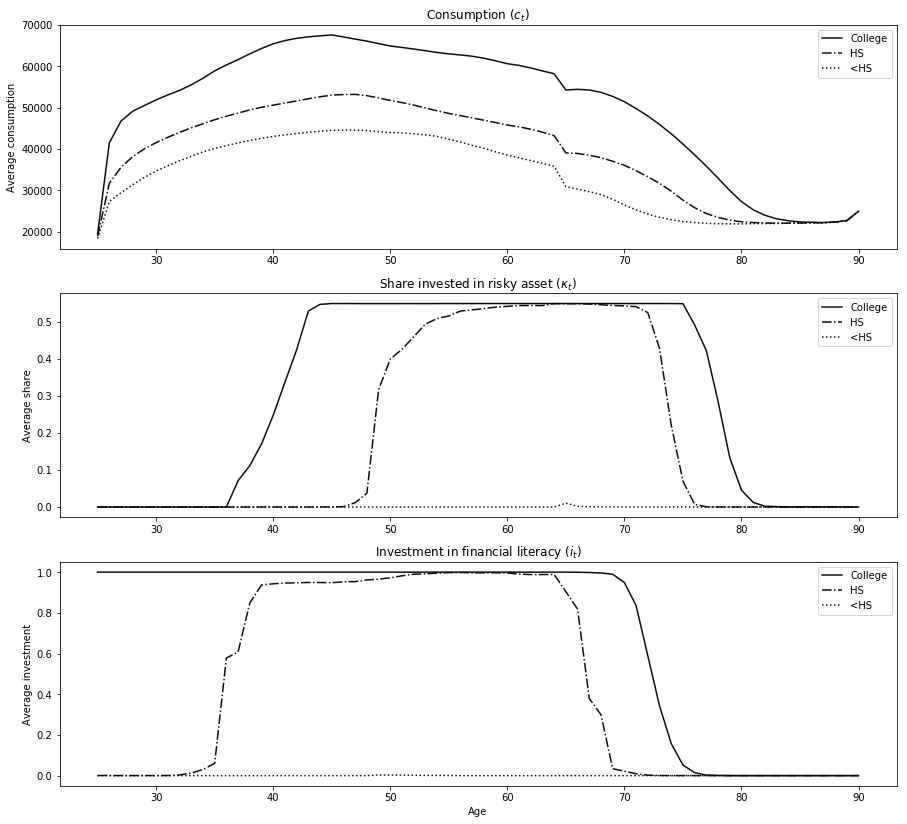

In [111]:
FIGSIZE = (15, 14)
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=FIGSIZE)
ax1.set_title("Consumption ($c_t$)")
ax1.plot(range(25, 91), choice_dict['College'][0].mean(axis=1), color=col, label = 'College', linestyle = '-')
ax1.plot(range(25, 91), choice_dict['HS'][0].mean(axis=1), color=col, label = 'HS', linestyle = '-.')
ax1.plot(range(25, 91), choice_dict['<HS'][0].mean(axis=1), color=col, label = '<HS', linestyle = ':')
ax1.set_ylabel('Average consumption')
#ax1.set_xlabel('Age')

ax1.legend()

ax2.set_title("Share invested in risky asset ($\kappa_t$)")
ax2.plot(range(25, 91), choice_dict['College'][1].mean(axis=1), color=col, label = 'College')
ax2.plot(range(25, 91), choice_dict['HS'][1].mean(axis=1), color=col, label = 'HS', linestyle = '-.')
ax2.plot(range(25, 91), choice_dict['<HS'][1].mean(axis=1), color=col, label = '<HS', linestyle = ':')
ax2.set_ylabel('Average share')
#ax2.set_xlabel('Age')

ax2.legend()

ax3.set_title("Investment in financial literacy ($i_t$)")
ax3.plot(range(25, 91), choice_dict['College'][2].mean(axis=1), color=col, label = 'College')
ax3.plot(range(25, 91), choice_dict['HS'][2].mean(axis=1), color=col, label = 'HS', linestyle = '-.')
ax3.plot(range(25, 91), choice_dict['<HS'][2].mean(axis=1), color=col, label = '<HS', linestyle = ':')
ax3.set_ylabel('Average investment')
ax3.set_xlabel('Age')
ax3.legend()

plt.savefig(pic_path + 'choices',bbox_inches='tight')
plt.show()


## State plots

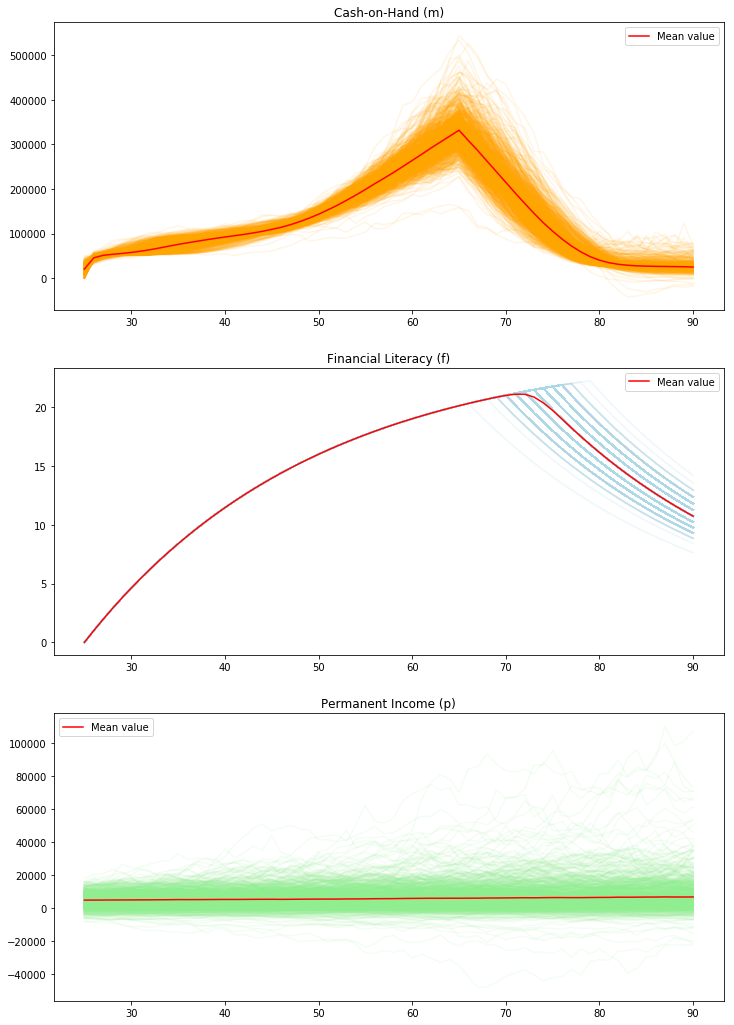

In [15]:
FIGSIZE = (12, 18)
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=FIGSIZE)
ax1.set_title("Cash-on-Hand (m)")
ax1.plot(range(25, 91), states[0,:], alpha=0.1, color='orange')
ax1.plot(range(25, 91), states[0,:].mean(axis=1), color='red', label = 'Mean value')
ax1.legend()

ax2.set_title("Financial Literacy (f)")
ax2.plot(range(25, 91), states[1,:], alpha=0.1, color='lightblue')
ax2.plot(range(25, 91), states[1,:].mean(axis=1), color='red', label = 'Mean value')
ax2.legend()

ax3.set_title("Permanent Income (p)")
ax3.plot(range(25, 91), states[2,:], alpha=0.1, color='lightgreen')
ax3.plot(range(25, 91), states[2,:].mean(axis=1), color='red', label = 'Mean value')
ax3.legend()


plt.show()


## Choice plots

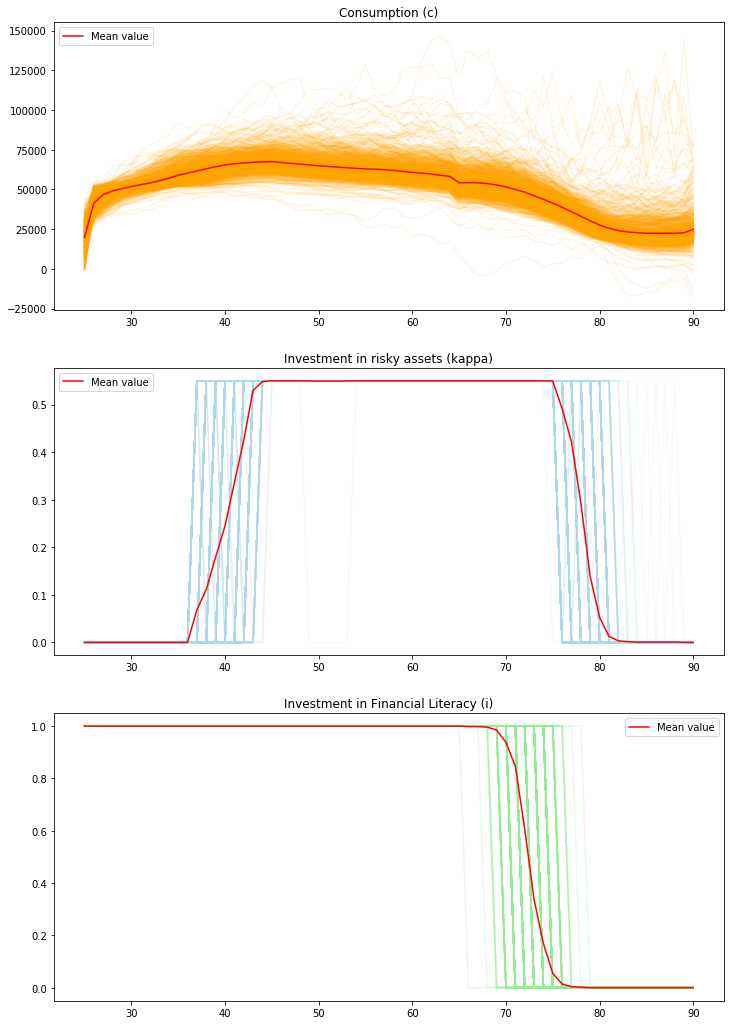

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=FIGSIZE)
ax1.set_title("Consumption (c)")
ax1.plot(range(25, 91), choices[0,:], alpha=0.1, color='orange')
ax1.plot(range(25, 91), choices[0,:].mean(axis=1), color='red', label = 'Mean value')
ax1.legend()


ax2.set_title("Investment in risky assets (kappa)")
ax2.plot(range(25, 91), choices[1,:], alpha=0.1, color='lightblue')
ax2.plot(range(25, 91), choices[1,:].mean(axis=1), color='red', label = 'Mean value')
ax2.legend()


ax3.set_title("Investment in Financial Literacy (i)")
ax3.plot(range(25, 91), choices[2,:], alpha=0.1, color='lightgreen')
ax3.plot(range(25, 91), choices[2,:].mean(axis=1), color='red', label = 'Mean value')
ax3.legend()

plt.show()